In [14]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 100
gamma = 0.01

Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.159 Seconds
Building M ...
	Done. Took 0.109 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished lsq: Error = 51.081
	Done. Took 0.113 Seconds
Extracting Qis ...
	Done. Took 0.001 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2): 1.420*(-0.043)^t + 5.585*(0.791)^t + 4.451*(0.667)^t + -9.999*(0.741)^t + -1.456573 * delta(t,0)
		RMSE = 0.093
		Matlab: [ 1.42 -0.04  5.58  0.79  4.45  0.67 -10.    0.74]
	Done. Took 11.082 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3): -0.788*(0.494)^t + -4.094*(-0.063)^t + 3.369*(0.528)^t + -4.276*(0.400)^t + 5.788955 * delta(t,0)
		RMSE = 0.064
		Matlab: [-0.79  0.49 -4.09 -0.06  3.37  0.53 -4.28  0.4 ]
	Done. Took 14.352 Seconds
Learning Convolution for Q(2,1) ...
	Q(2,1): -1.304*(0.078)^t + -2.583*(-0.079)^t + 0.041*(-0.847)^t + -2.356*(0.079)^t + 6.201325 * delta(t,0)
		RMSE = 0.041
		Matlab: [-

{0: {1: array([ 1.42, -0.04,  5.58,  0.79,  4.45,  0.67, -10.  ,  0.74]),
  2: array([-0.79,  0.49, -4.09, -0.06,  3.37,  0.53, -4.28,  0.4 ])},
 1: {0: array([-1.3 ,  0.08, -2.58, -0.08,  0.04, -0.85, -2.36,  0.08]),
  2: array([-3.11,  0.07,  3.37, -0.12, -5.19, -0.12, -0.21, -0.12])},
 2: {0: array([-4.68,  0.84, -4.42, -0.04,  6.69,  0.8 , -2.26,  0.64]),
  1: array([ 0.11,  0.96,  2.11,  0.01,  0.41, -0.24,  2.05,  0.01])}}

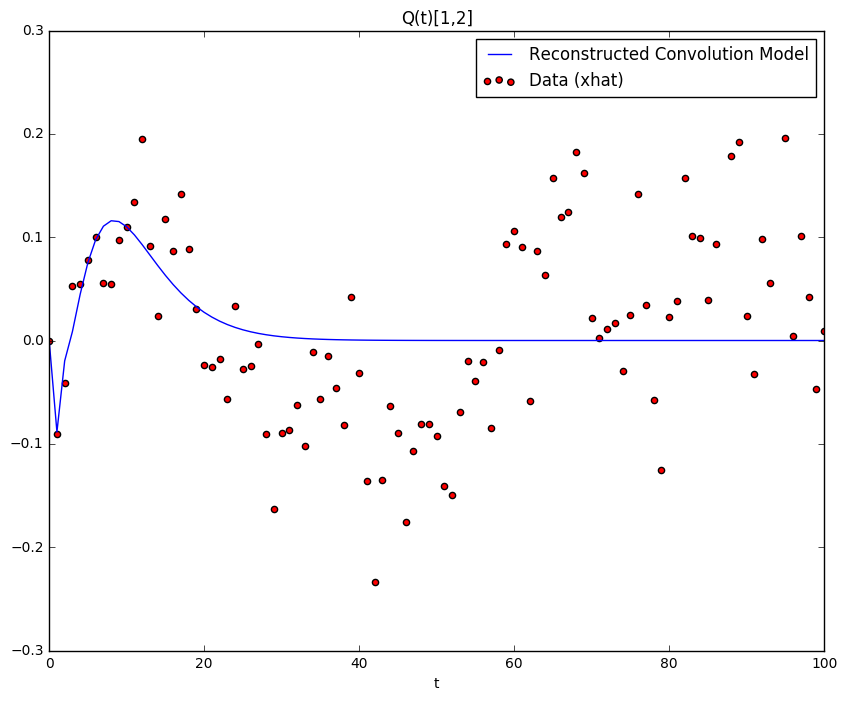

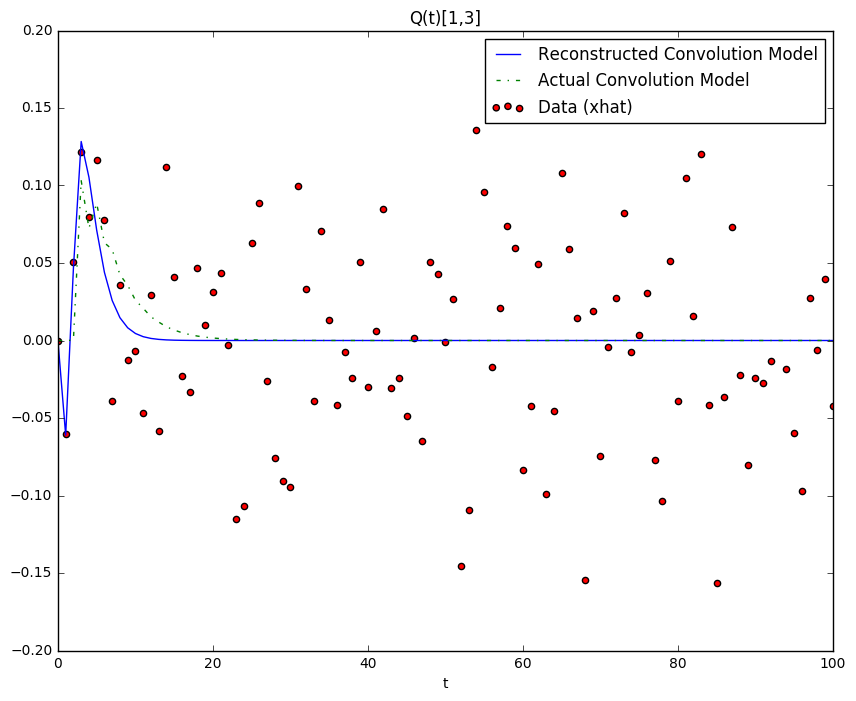

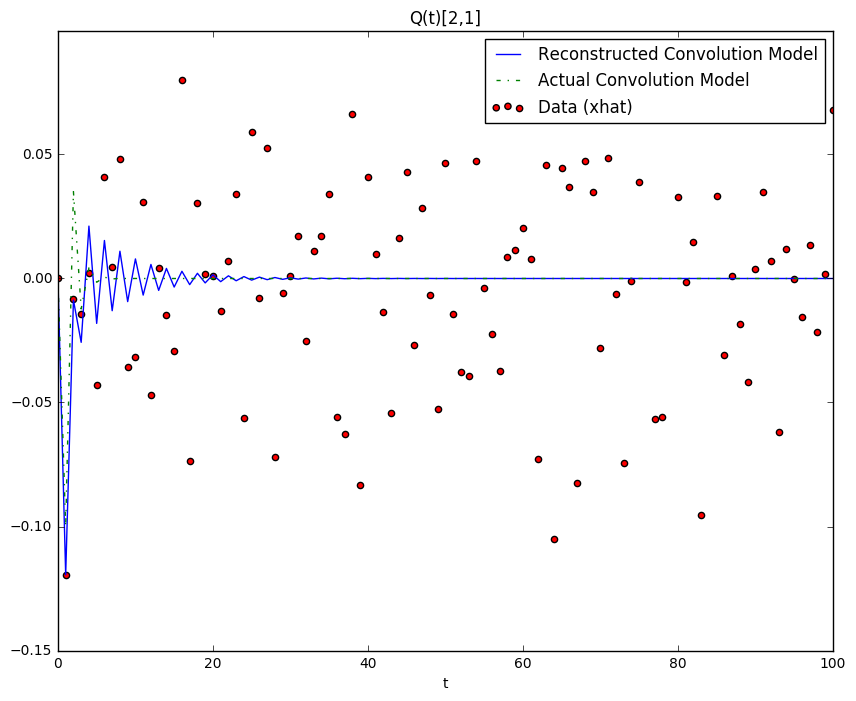

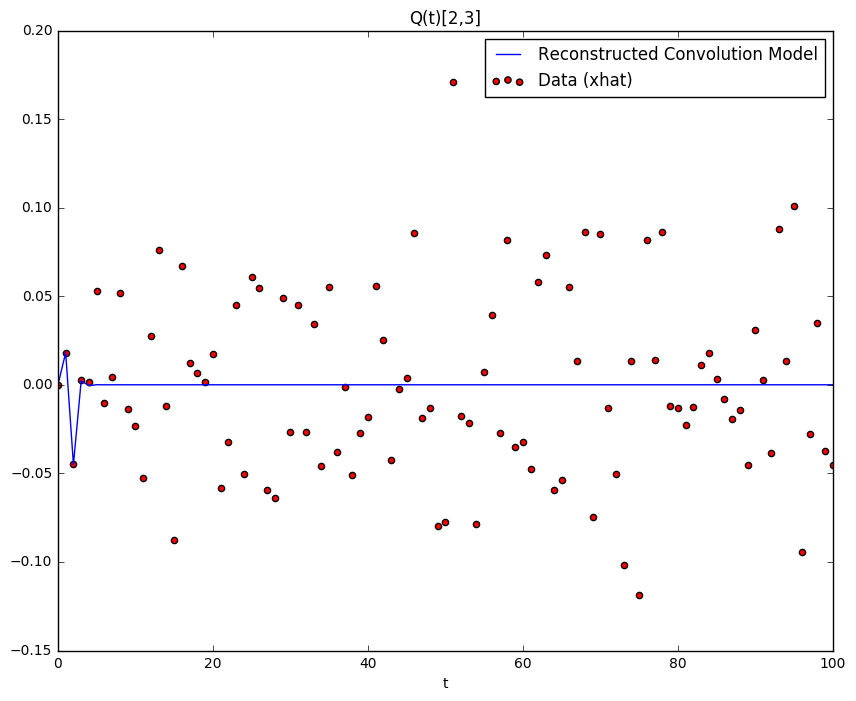

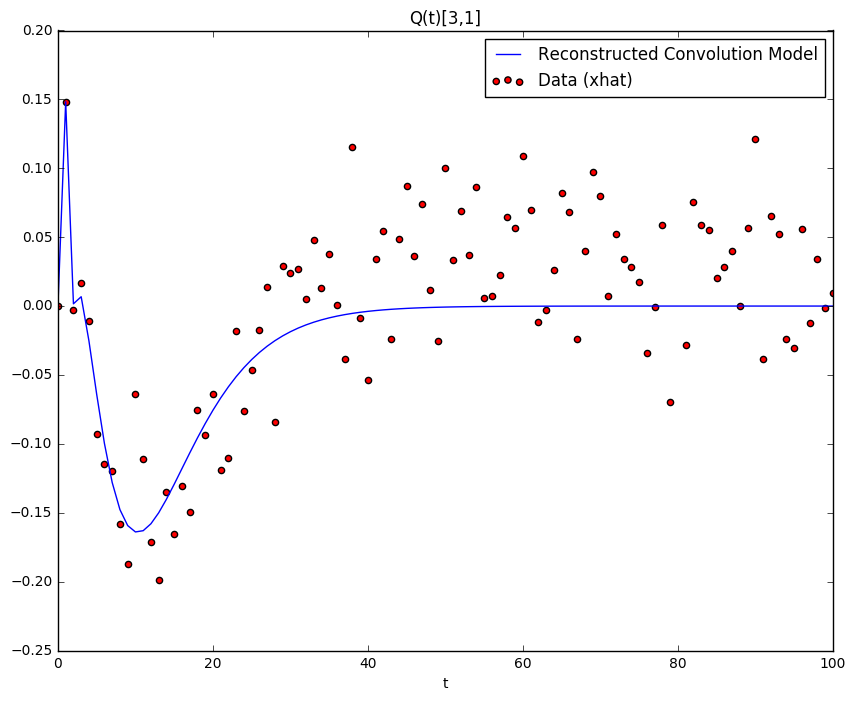

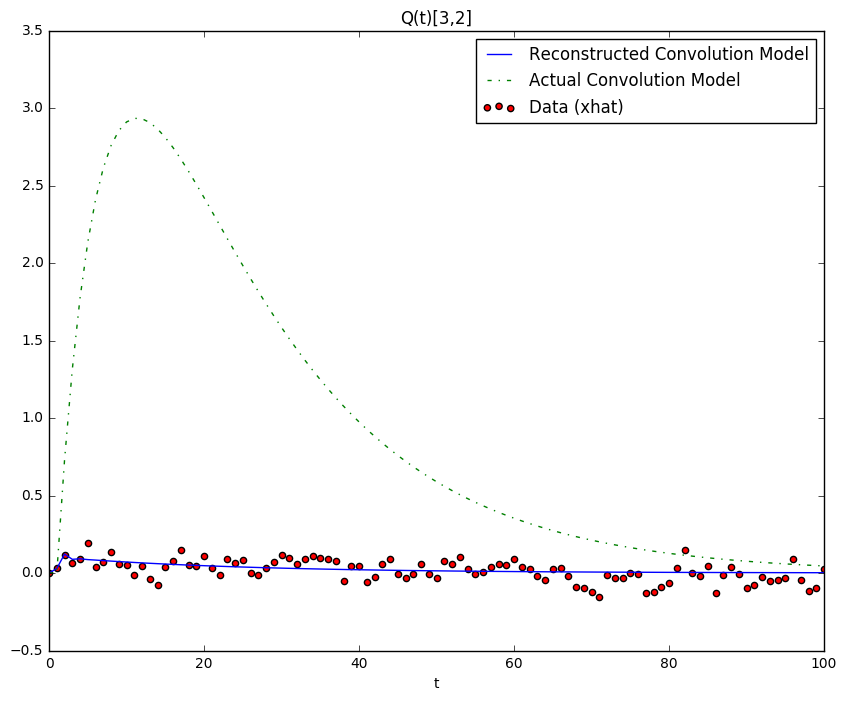

In [15]:
%matplotlib inline
A = [
    [0.75, 0, 0, 0, 0, 1.2],
    [-.1, -.35, 0, 0, 0, 0],
    [0, 0, .85, -1, 0, 0],
    [0, -.73, 0, .95, 0, 0],
    [0, 0, .43, 0, -.6, 0],
    [0, 0, 0, 0, .2, .55]

]
A = np.array(A)
B = [
    [1.4, 0, 0],
    [0, -.25, 0],
    [0, 0, 0.75],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
]
B = np.array(B)
C = [
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
]
C = np.array(C)

# u = pd.read_csv('../scripts/u.csv', header=None).values
u = np.random.rand(R * 6 + 1, 3) * 2 - 1
y = ss_sim(A, B, C, u)

Pbool = np.identity(3)

real_params = {
    (1, 3): [.51, .75, -.11, -.6, -.816, .55],
    (2, 1): [.286, -.35],
    (3, 2): [7.684, .95, -8.588, .85]
}

recon = Reconstructor(debug=True, r=R, Pbool=Pbool, max_iterations=1000, bounds=10, order=4, real_params=real_params, robust=False)
recon.unmeasured(y + np.random.randn(u.shape[0], u.shape[1]),plot=True)  #, ij=(1,3))